# Equilibrium Temperature

* The equilibrium temperature of an object like a planet or a moon is the temperature at which the heat energy it receives from its star (or another primary heat source) is in balance with the heat it radiates away into space. This temperature reflects the balance between incoming solar radiation absorbed and outgoing thermal radiation emitted by the object. For a planet in space without any internal heat source, the equilibrium temperature can be estimated using the formula:
> $P_{\text{in}} = L_{o} (1-A) (\frac{\pi \cdot R_p^{2}}{4 \cdot \pi \cdot D^2})$

  where:

  $L_{o}$ is the luminosity of the sun: $L_{o} = 4 \cdot \pi \cdot R_{o}^{2} \cdot \sigma \cdot T_{o}^{4}$

  $A$: albedo of the planet which is how much incident radiation is reflected back into space, objects with icier or whiter surfaces have a higher albedo since ice and white objects reflect more light than darker objects.

  $\sigma$: Stefan-Boltzman constant

* Equating $P_{in}$ and $P_{out}$:
> $T_{p} = T_{\odot}(1-a)^{\frac{1}{4}}\sqrt{\frac{R_{\odot}}{2D}}$

In [1]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import Image
from ipywidgets import interact,interactive,fixed,interact_manual,FloatSlider,Layout
import numpy as np

In [2]:
albedoEarth = 0.306 # Earth's average albedo
auMeters = 149597870700 # 1 Astronomical Unit in metres
kelvinToDegree = 273.15 # conversion Kelvin to degrees Celcius
distanceFromSun = 1*auMeters # average distance to the Sun in metres
temperature = 5772 # K
radiusSun = 6.957*10**8 # m

In [3]:
equilibriumTemperature = temperature*(1-albedoEarth)**0.25*np.sqrt(radiusSun/2/distanceFromSun)
print(f"The Equilibrium Tmperature of the Earth is: {equilibriumTemperature:.0f} K")
print(f"The Equilibrium Tmperature of the Earth is: {equilibriumTemperature-kelvinToDegree:.0f} C")

The Equilibrium Tmperature of the Earth is: 254 K
The Equilibrium Tmperature of the Earth is: -19 C


In [4]:
StefanBoltzmanConstant = 5.670374419*10**(-8) # W m^-2 K^-4

In [5]:
luminositySun = 4*np.pi*radiusSun**2*StefanBoltzmanConstant*temperature**4
print(f"Luminosity of Sun: {luminositySun} W")

Luminosity of Sun: 3.827990903152591e+26 W


**Stars emit all wavelengths of the electromagnetic spectrum but with different intensity. Stars emit the most light at a certain peak wavelength, $\lambda_{peak}$. We can use Wien's Law to calculate the peak wavlength for our Sun:**
> $\lambda_{peak} = \frac{b}{T}$

where:

$b$: Wien's displacement constant ($2.897771955 \times 10^{-3} mK$)

$T$: the effective surface temperature, this is the temperature of a blackbody that would emit the same amount of radiation as the object or star,for the Sun this is 5557 K

In [6]:
temperatureSun = 5772 # K
wienConstant = 2.897771955*10**(-3) # m K

In [7]:
peakWavelength = wienConstant/temperatureSun
print(f"The peak wavelength is : {peakWavelength*10**9:.0f} nm")

The peak wavelength is : 502 nm


In [8]:
@interact(temperature=(1,10000))
def PeakWavelength(temperature):
  peakWavelength = wienConstant/temperature
  print(f"The peak wavelength is : {peakWavelength*10**9:.0f} nm")

interactive(children=(IntSlider(value=5000, description='temperature', max=10000, min=1), Output()), _dom_clas…

# Black Body Curve

* A black-body is an object that absorbs and emits radiation perfectly at all frequencies of the electromagnetic spectrum. The Sun doesn't emit the same amount of radiation for each wavelength of light, we know this having just calculated the peak wavelength emitted. To work out the intensity of radiation emitted at other wavelengths we will need Planck's Law:
> $B(\lambda, T) = \frac{2hc^2}{\lambda^5}\frac{1}{e^{\frac{hc}{\lambda k_B T}}-1}$

where:

$B$: the spectral intensity for a given wavelength, $\lambda$ and  surface temperature of a star, $T$

$h$: Planck's constant

$c$: the speed of light in a vacuum

$k_B$: the Boltzmann constant

$T$: the effective surface temperature

* A black body curve, also known as a Planckian curve or Planck's law, represents the spectral energy distribution of a black body, which is an idealized physical body that perfectly absorbs all incident electromagnetic radiation regardless of frequency or angle of incidence. A black body also emits radiation in a characteristic, continuous spectrum that depends only on the body's temperature. This curve shows the amount of energy emitted at different wavelengths for a given temperature.

In [9]:
import matplotlib.patches as mpatch
from matplotlib import rc

In [10]:
plt.style.use("dark_background")

for real spectrum image: https://drive.google.com/file/d/1JM9i2KoXS4fdc_D69ovbmLFi5djqu14Z/view?usp=sharing

In [18]:
spectrumImage = "/content/spectrum.png"

In [23]:
# define constants
T = 5772 # K
kb = 1.380649*10**(-23) # J/K
c = 299792458 # m/s
h = 6.62607015*10**(-34) # Js
# set wavelength array and B arrays
l = np.arange(0.01,3,0.01)*10**(-6)
B = np.zeros(len(l))
BHigh = np.zeros(len(l))
BLow = np.zeros(len(l))
BLower = np.zeros(len(l))
BLower2 = np.zeros(len(l))

In [24]:
# calculate B's for the different Temps
for i in range(len(l)):
    B[i] = 2*h*c**2/l[i]**5 * 1/(np.exp(h*c/(l[i]*kb*T))-1)
    BHigh[i] = 2*h*c**2/l[i]**5 * 1/(np.exp(h*c/(l[i]*kb*6000))-1)
    BLow[i] = 2*h*c**2/l[i]**5 * 1/(np.exp(h*c/(l[i]*kb*5000))-1)
    BLower[i] = 2*h*c**2/l[i]**5 * 1/(np.exp(h*c/(l[i]*kb*4000))-1)
    BLower2[i] = 2*h*c**2/l[i]**5 * 1/(np.exp(h*c/(l[i]*kb*3000))-1)

In [25]:
# wein's law to calculate the peak wavelengths for an array of temperatures
b = 2.897771955*10**(-3) # m K
TR = np.arange(1000, 7000)
lpR = b/TR
Bmax = np.zeros(len(lpR))
for i in range(len(lpR)):
    Bmax[i] = 2*h*c**2/lpR[i]**5 * 1/(np.exp(h*c/(lpR[i]*kb*TR[i]))-1)
# weins law but for just the 5 peaks for the curves
Temps = np.array([6000,T,5000,4000,3000])
lpoints = b/Temps
Bpoints = 2*h*c**2/lpoints**5 * 1/(np.exp(h*c/(lpoints*kb*Temps))-1)
# construct legend labels
labels = []
for i in range(len(Temps)):
    labels.append(r"${:.0f}$".format(Temps[i])+r"$\ K,\ \ $"+r'$\lambda_{peak}$ = '+r"${:.0f}$".format(lpoints[i]*10**9)+r' $nm$')

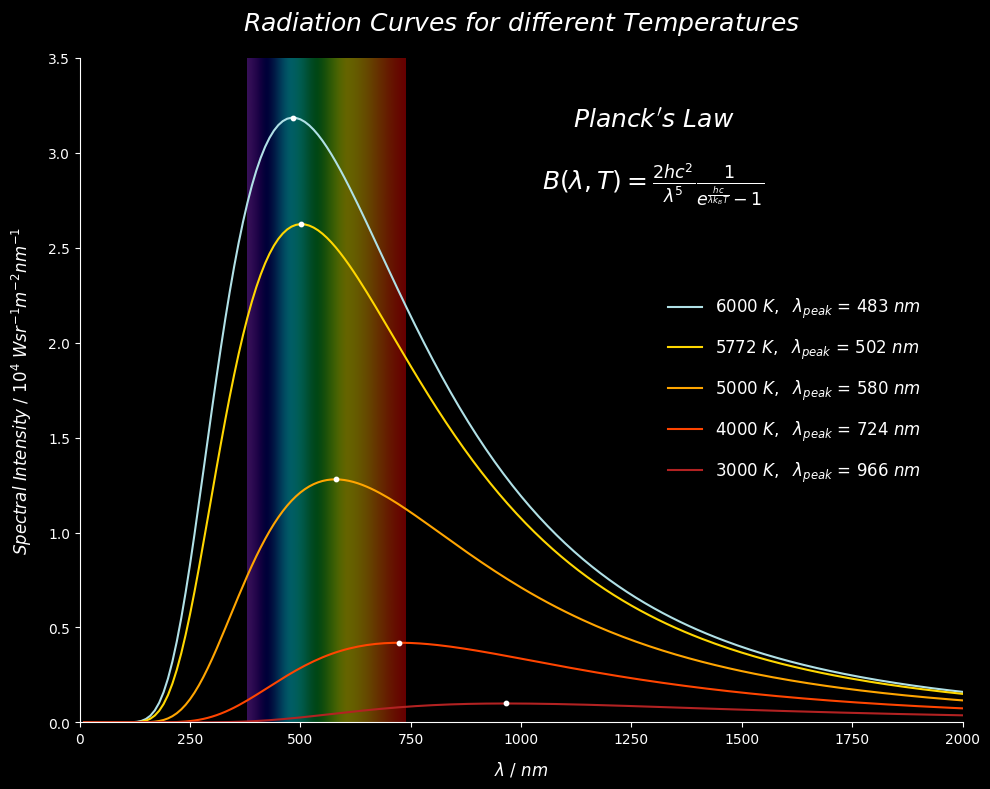

In [27]:
fig = plt.figure(num=1, figsize=(10,8))
ax = plt.subplot(xlim=(0,2000),ylim=(0,3.5))
ax.set_title(r"$Radiation\ Curves\ for\ different\ Temperatures$", pad=20, fontsize=18)
ax.set_xlabel(r'$\lambda\ /\ nm$', labelpad=10, fontsize=12)
ax.set_ylabel(r"$Spectral\ Intensity\ /\ 10^{4}\ Wsr^{-1}m^{-2}nm^{-1}$", labelpad=10, fontsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
spectrum = plt.imread(spectrumImage)
ax.imshow(spectrum, extent=[380,740,0,3.5], alpha=0.4)
ax.set_aspect('auto')
ax.plot(l*10**9, BHigh/10**13, c="powderblue", label=labels[0])
ax.plot(l*10**9, B/10**13, c="gold", label=labels[1])
ax.plot(l*10**9, BLow/10**13, c="orange", label=labels[2])
ax.plot(l*10**9, BLower/10**13, c="orangered", label=labels[3])
ax.plot(l*10**9, BLower2/10**13, c="firebrick", label=labels[4])
plt.scatter(lpoints*10**9,Bpoints/10**13,c="white", s=10, zorder=6)
plotText = r"$Planck's\ Law$"+"\n"+r"$B(\lambda,T) = \frac{2hc^2}{\lambda^5} \frac{1}{e^{\frac{hc}{\lambda k_BT}}-1}$"
ax.text(.65, .85, plotText, size=18, va="center", ha="center", multialignment="center", linespacing=2, transform=ax.transAxes)
plt.legend(frameon=False, borderpad=2, labelspacing=1, loc=7, fontsize=12)
plt.tight_layout()
plt.show()